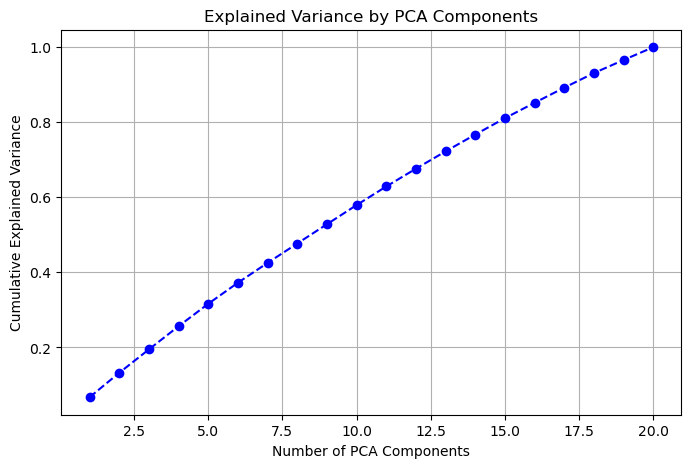

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.0694 (Higher is better)

🔹 Predicted Cluster: [4]


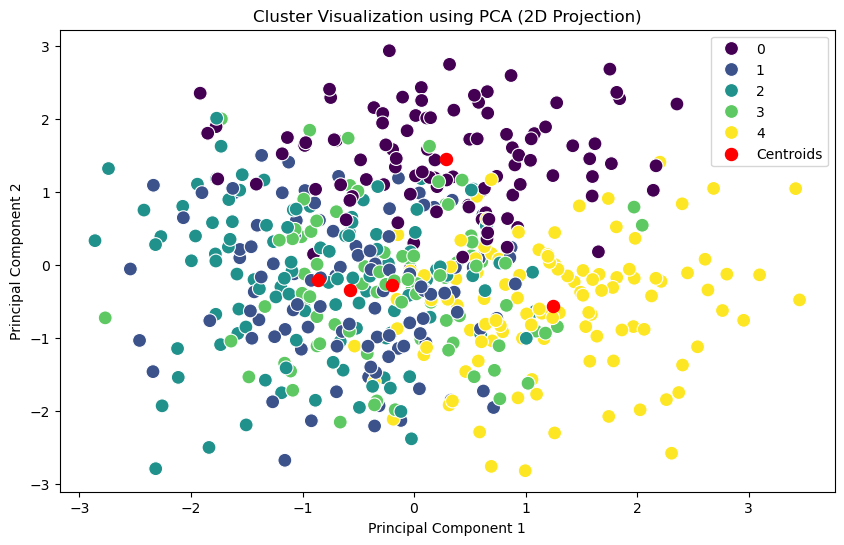

Unique clusters found: [0 1 2 3 4]


In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### PHASE 1: Data Preprocessing ###
# Simulated dataset (Can replace with real-world data)
data = np.random.rand(500, 20)  

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Visualize variance explained by PCA
pca_full = PCA(n_components=20)
pca_full.fit(data_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

# Reduce dimensionality using PCA
pca_model = PCA(n_components=10)  # Choosing based on the variance plot
transformed_data = pca_model.fit_transform(data_scaled)
joblib.dump(pca_model, "pca_model.pkl")

### PHASE 2: Model Training ###
# Train K-Means with 5 clusters
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(transformed_data)
joblib.dump(kmeans_model, "kmeans_model.pkl")

# Compute clustering quality
silhouette_avg = silhouette_score(transformed_data, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better)")

### PHASE 3: Prediction Function ###
def get_cluster_prediction(input_data):
    transformed_data = pca_model.transform(input_data)  # Apply PCA transformation
    cluster = kmeans_model.predict(transformed_data)  # Predict cluster
    return cluster.tolist()

### PHASE 4: Visualization ###
def visualize_clusters():
    # Transform full dataset to 2D for visualization
    pca_2d = PCA(n_components=2)
    reduced_data = pca_2d.fit_transform(transformed_data)
    
    # Get cluster labels
    cluster_labels = kmeans_model.predict(transformed_data)
    
    # Plot clusters
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette='viridis', s=100)
    plt.title("Cluster Visualization using PCA (2D Projection)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Clusters", loc="upper right")
    
    # Annotate centers
    centers_2d = pca_2d.transform(kmeans_model.cluster_centers_)
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker=".", s=300, c="red", label="Centroids")
    plt.legend()
    plt.show()
    
    # Display unique clusters found
    print(f"Unique clusters found: {np.unique(cluster_labels)}")

### 📌 TESTING PHASE ###
# Generate a sample input (Ensure it matches 20 features)
sample_input = np.random.rand(1, 20)
predicted_cluster = get_cluster_prediction(sample_input)
print(f"\n🔹 Predicted Cluster: {predicted_cluster}")

# Visualize the clusters
visualize_clusters()
